### Problem 1: Linear Regression


You are hired by a company Gem Stones co ltd, which is a cubic zirconia manufacturer. You are provided with the dataset containing the prices and other attributes of almost 27,000 cubic zirconia (which is an inexpensive diamond alternative with many of the same qualities as a diamond). The company is earning different profits on different prize slots. You have to help the company in predicting the price for the stone on the bases of the details given in the dataset so it can distinguish between higher profitable stones and lower profitable stones so as to have better profit share. Also, provide them with the best 5 attributes that are most important.


**Carat**	 Carat weight of the cubic zirconia.

**Cut**	     Describe the cut quality of the cubic zirconia. Quality is increasing order Fair, Good, Very Good, Premium, Ideal.

**Color** 	 Colour of the cubic zirconia.With D being the worst and J the best.

**Clarity**	 Clarity refers to the absence of the Inclusions and Blemishes. (In order from Worst to Best in terms of avg price)              IF, VVS1, VVS2, VS1, VS2, Sl1, Sl2, l1

**Depth**	 The Height of cubic zirconia, measured from the Culet to the table, divided by its average Girdle Diameter.

**Table**	 The Width of the cubic zirconia's Table expressed as a Percentage of its Average Diameter.

**Price**	 the Price of the cubic zirconia.

**X**	     Length of the cubic zirconia in mm.

**Y**	     Width of the cubic zirconia in mm.

**Z**	     Height of the cubic zirconia in mm.



In [1]:
#pip install pandas

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import tree
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import GridSearchCV

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn import metrics,model_selection

### 1.1. Read the data and do exploratory data analysis. Describe the data briefly. (Check the null values, Data types, shape, EDA, duplicate values). Perform Univariate and Bivariate Analysis.

**Read the data**

In [2]:
zirconia=pd.read_csv('cubic_zirconia.csv')

**Check the data**

In [3]:
zirconia.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z,price
0,1,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,2,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,3,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,4,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,5,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779


In [4]:
zirconia.drop('Unnamed: 0', axis=1,inplace=True)

**Get the info**

In [5]:
zirconia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26967 entries, 0 to 26966
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    26967 non-null  float64
 1   cut      26967 non-null  object 
 2   color    26967 non-null  object 
 3   clarity  26967 non-null  object 
 4   depth    26270 non-null  float64
 5   table    26967 non-null  float64
 6   x        26967 non-null  float64
 7   y        26967 non-null  float64
 8   z        26967 non-null  float64
 9   price    26967 non-null  int64  
dtypes: float64(6), int64(1), object(3)
memory usage: 2.1+ MB


In [6]:
zirconia.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
carat,26967.0,NaN,NaN,NaN,0.798375,0.477745,0.2,0.4,0.7,1.05,4.5
cut,26967,5,Ideal,10816,NaN,NaN,NaN,NaN,NaN,NaN,NaN
color,26967,7,G,5661,NaN,NaN,NaN,NaN,NaN,NaN,NaN
clarity,26967,8,SI1,6571,NaN,NaN,NaN,NaN,NaN,NaN,NaN
depth,26270.0,NaN,NaN,NaN,61.745147,1.41286,50.8,61.0,61.8,62.5,73.6
table,26967.0,NaN,NaN,NaN,57.45608,2.232068,49.0,56.0,57.0,59.0,79.0
x,26967.0,NaN,NaN,NaN,5.729854,1.128516,0.0,4.71,5.69,6.55,10.23
y,26967.0,NaN,NaN,NaN,5.733569,1.166058,0.0,4.71,5.71,6.54,58.9
z,26967.0,NaN,NaN,NaN,3.538057,0.720624,0.0,2.9,3.52,4.04,31.8
price,26967.0,NaN,NaN,NaN,3939.518115,4024.864666,326.0,945.0,2375.0,5360.0,18818.0


**Check for Null Values**

In [7]:
zirconia.isnull().sum()

carat        0
cut          0
color        0
clarity      0
depth      697
table        0
x            0
y            0
z            0
price        0
dtype: int64

**Check for Duplicates**

In [8]:
zirconia.duplicated().sum()

34

In [9]:
zirconia.drop_duplicates(inplace=True)

In [10]:
zirconia.select_dtypes(include='object').head()

,cut,color,clarity
0,Ideal,E,SI1
1,Premium,G,IF
2,Very Good,E,VVS2
3,Ideal,F,VS1
4,Ideal,F,VVS1


In [11]:
zirconia.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26933 entries, 0 to 26966
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    26933 non-null  float64
 1   cut      26933 non-null  object 
 2   color    26933 non-null  object 
 3   clarity  26933 non-null  object 
 4   depth    26236 non-null  float64
 5   table    26933 non-null  float64
 6   x        26933 non-null  float64
 7   y        26933 non-null  float64
 8   z        26933 non-null  float64
 9   price    26933 non-null  int64  
dtypes: float64(6), int64(1), object(3)
memory usage: 2.3+ MB


In [12]:
zirconia.isnull().sum()

carat        0
cut          0
color        0
clarity      0
depth      697
table        0
x            0
y            0
z            0
price        0
dtype: int64

**Check for Outliers**

In [13]:
cont=zirconia.dtypes[(zirconia.dtypes!='object')].index
cont

Index(['carat', 'depth', 'table', 'x', 'y', 'z', 'price'], dtype='object')

C:\Users\siva\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\siva\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\siva\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\siva\anaconda3\lib\site-p

Shape before Outliers Treatment (26933, 10)


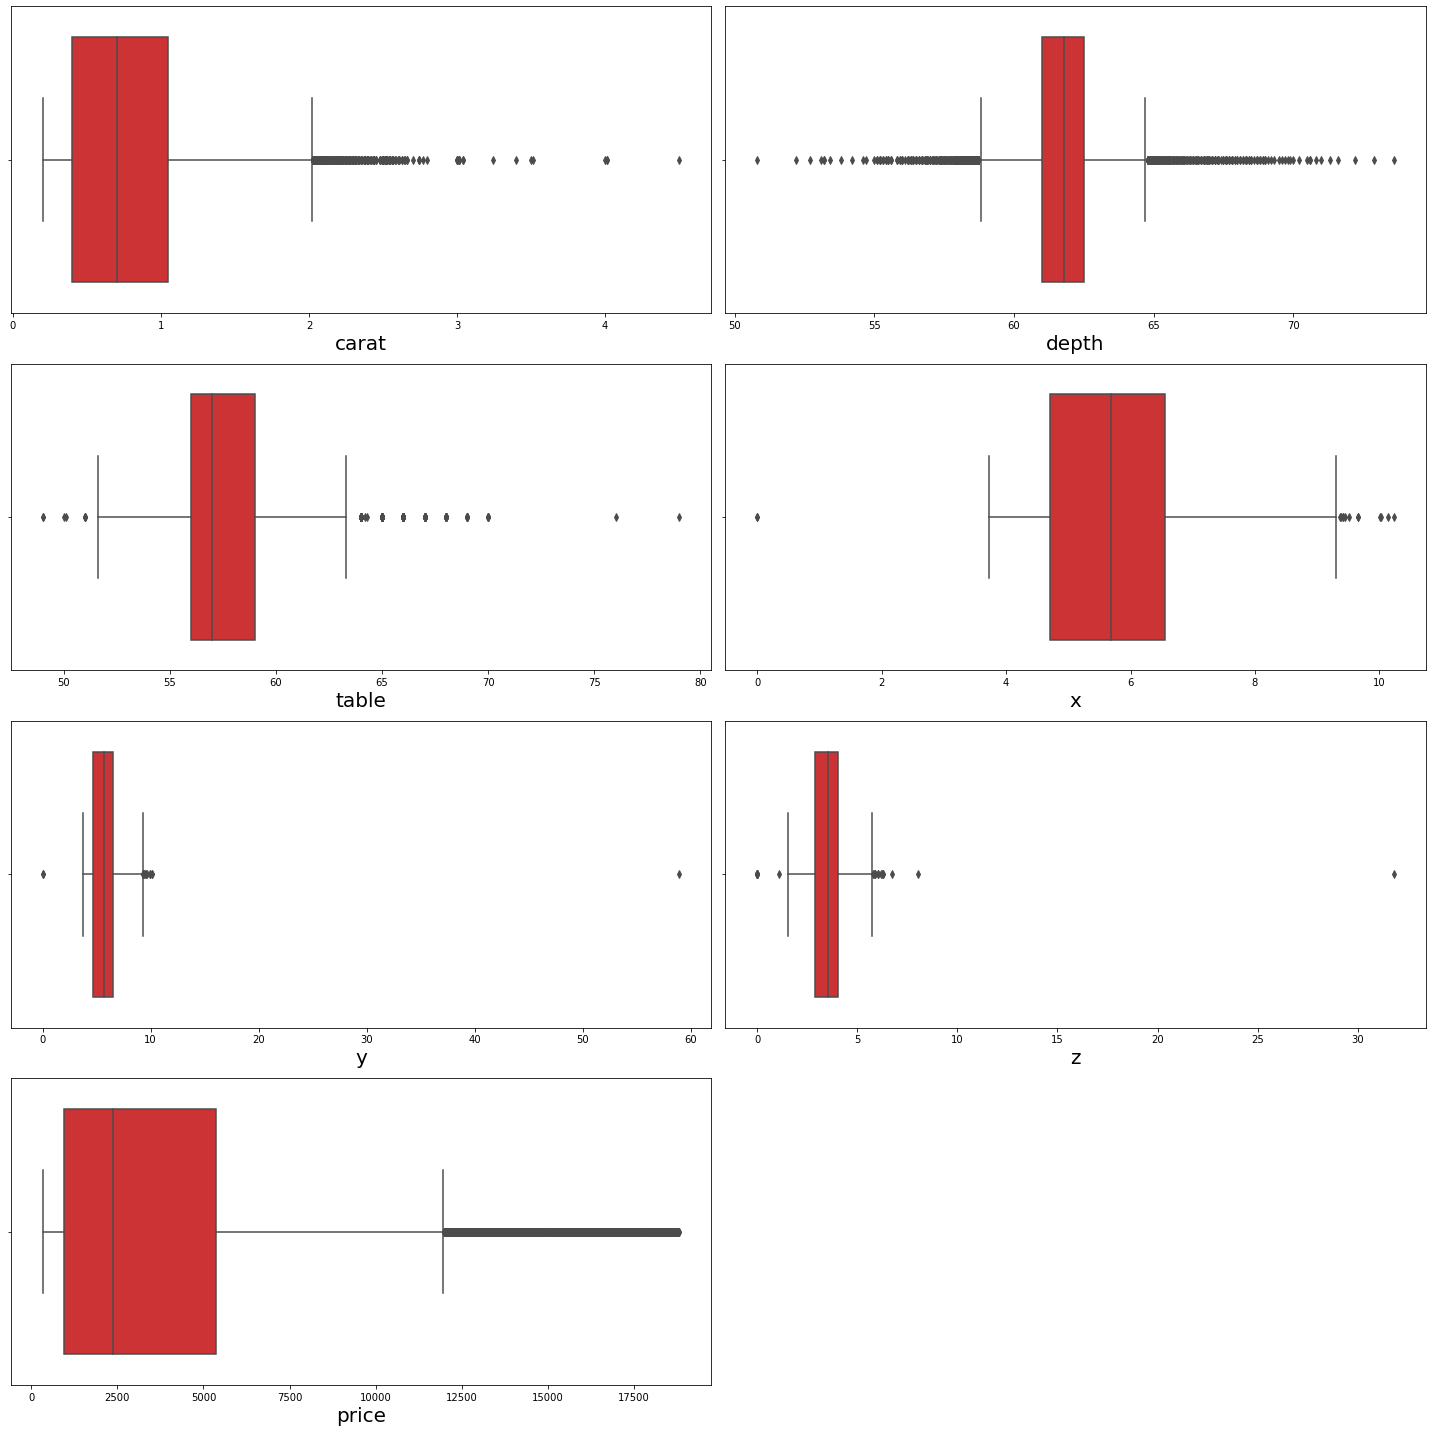

In [14]:
data_plot=zirconia[cont]
fig=plt.figure(figsize=(20,20))
for i in range(0,len(data_plot.columns)):
    ax=fig.add_subplot(4,2,i+1)
    sns.boxplot(data_plot[data_plot.columns[i]],palette="Set1")
    plt.xlabel(xlabel = data_plot.columns[i],fontsize=20)
    plt.tight_layout()
print('Shape before Outliers Treatment',zirconia.shape)

**Outliers Treatment**

In [15]:
Q1 = zirconia.quantile(0.25) # Getting First quantile for all numerical variables
Q3 = zirconia.quantile(0.75) # Getting Second quantile for all numerical variables
IQR = Q3 - Q1          # Getting IQR values
lower_range= Q1-(1.5 * IQR) #Getting Lower Limit for all numerical variables
upper_range= Q3+(1.5 * IQR) #Getting Upper Limit for all numerical variables

In [16]:
lower_range

carat      -0.575
depth      58.750
table      51.500
x           1.950
y           1.965
z           1.190
price   -5671.500
dtype: float64

In [17]:
upper_range

carat        2.025
depth       64.750
table       63.500
x            9.310
y            9.285
z            5.750
price    11972.500
dtype: float64

In [18]:
zirconia['carat']=np.where(zirconia['carat']> 2.025,2.025,zirconia['carat'])
zirconia['carat']=np.where(zirconia['carat']< -0.575,-0.575,zirconia['carat'])

In [19]:
zirconia['depth']=np.where(zirconia['depth']> 64.750,64.750,zirconia['depth'])
zirconia['depth']=np.where(zirconia['depth']< 58.750,58.750,zirconia['depth'])

In [20]:
zirconia['table']=np.where(zirconia['table']> 63.500,63.500,zirconia['table'])
zirconia['table']=np.where(zirconia['table']< 51.500,51.500,zirconia['table'])

In [21]:
zirconia['x']=np.where(zirconia['x']> 9.310,9.310,zirconia['x'])
zirconia['x']=np.where(zirconia['x']< 1.950,1.950,zirconia['x'])

In [22]:
zirconia['y']=np.where(zirconia['y']> 9.285,9.285,zirconia['y'])
zirconia['y']=np.where(zirconia['y']< 1.965,1.965,zirconia['y'])

In [23]:
zirconia['z']=np.where(zirconia['z']> 5.750,5.750,zirconia['z'])
zirconia['z']=np.where(zirconia['z']< 1.190,1.190,zirconia['z'])

In [24]:
zirconia['price']=np.where(zirconia['price']> 11972.500,11972.500,zirconia['price'])
zirconia['price']=np.where(zirconia['price']< -5671.500,-5671.500,zirconia['price'])

C:\Users\siva\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\siva\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\siva\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\siva\anaconda3\lib\site-p

Shape after Outliers Treatment (26933, 10)


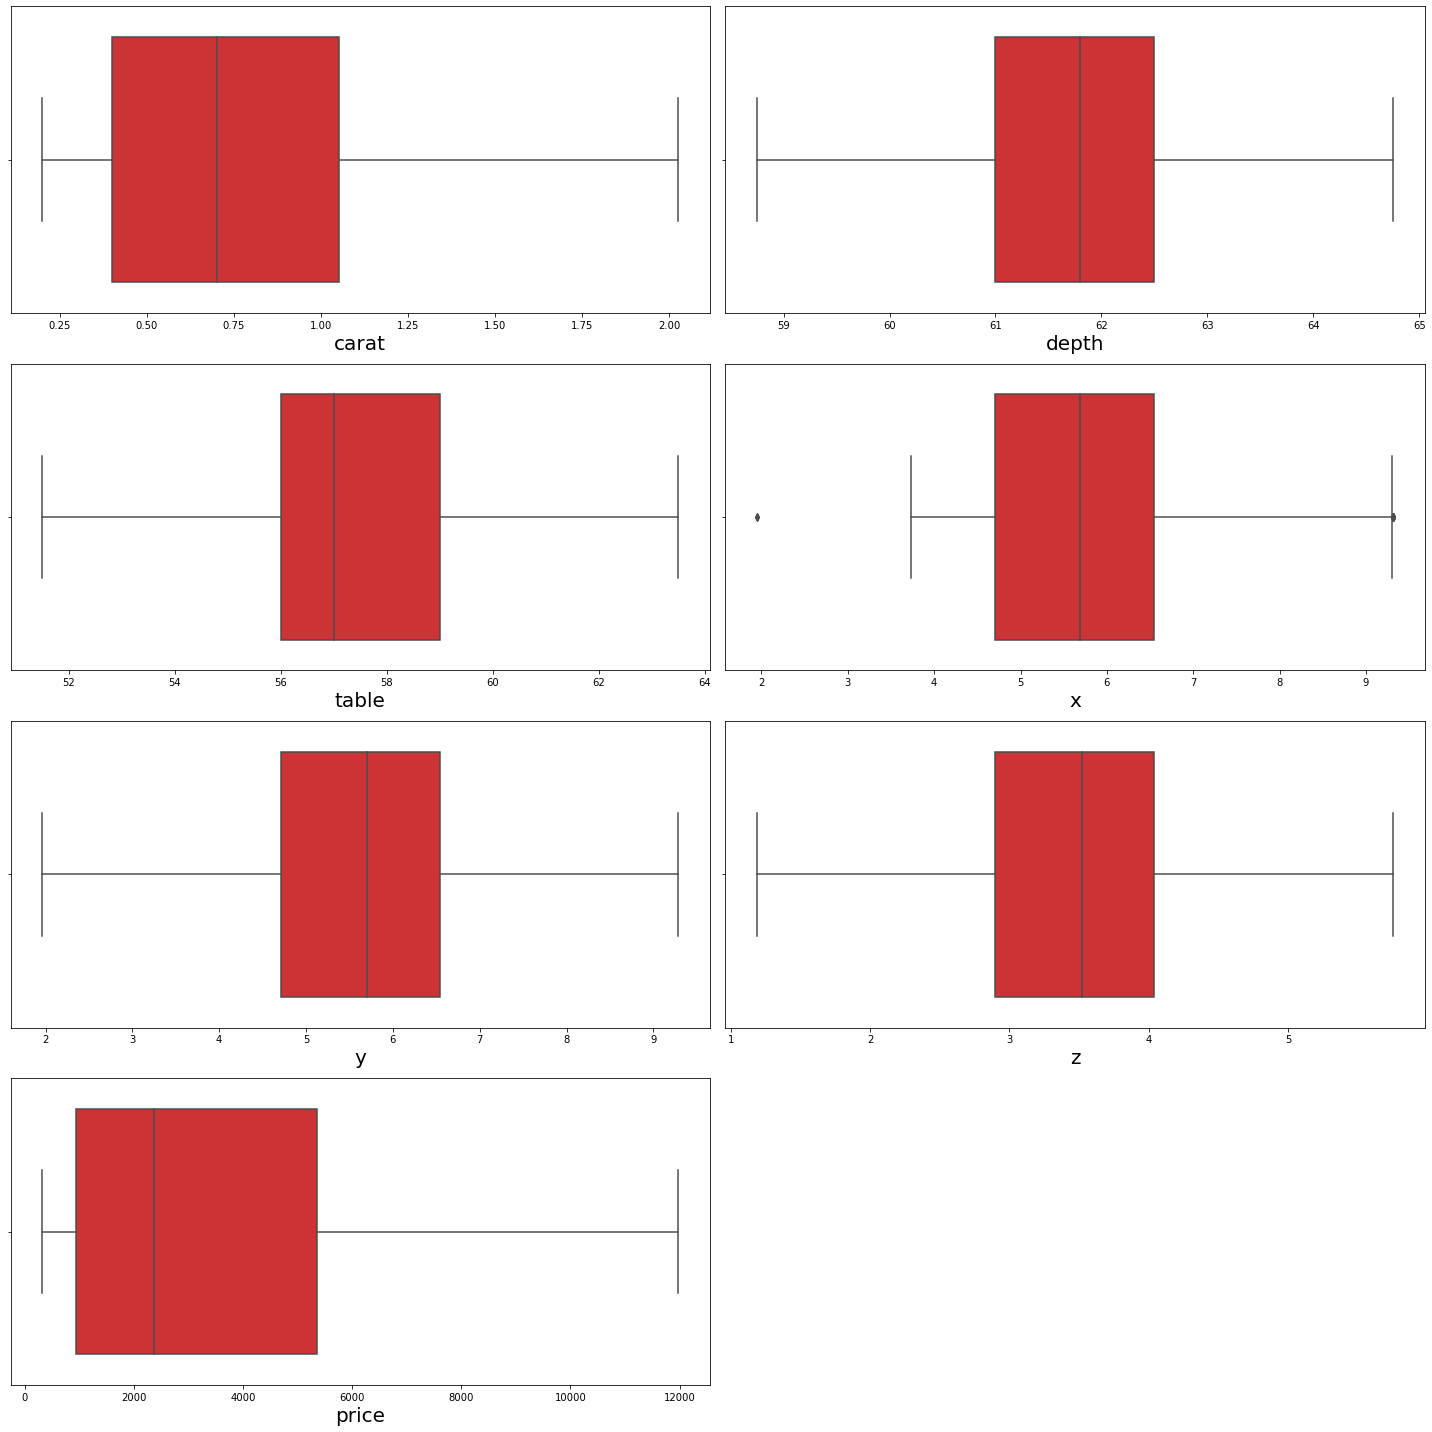

In [25]:
data_plot=zirconia[cont]
fig=plt.figure(figsize=(20,20))
for i in range(0,len(data_plot.columns)):
    ax=fig.add_subplot(4,2,i+1)
    sns.boxplot(data_plot[data_plot.columns[i]],palette="Set1")
    plt.xlabel(xlabel = data_plot.columns[i],fontsize=20)
    plt.tight_layout()
print('Shape after Outliers Treatment',zirconia.shape)

**Null Values Imputation**

In [26]:
median = zirconia['depth'].median()
zirconia['depth'] = zirconia['depth'].fillna(median)   

In [27]:
zirconia.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

**Correlation Plot**

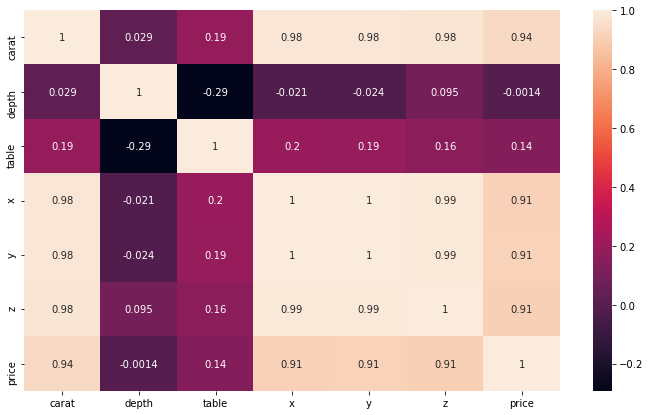

In [28]:
plt.figure(figsize=(12,7))
sns.heatmap(zirconia.corr(),annot=True)
plt.show()

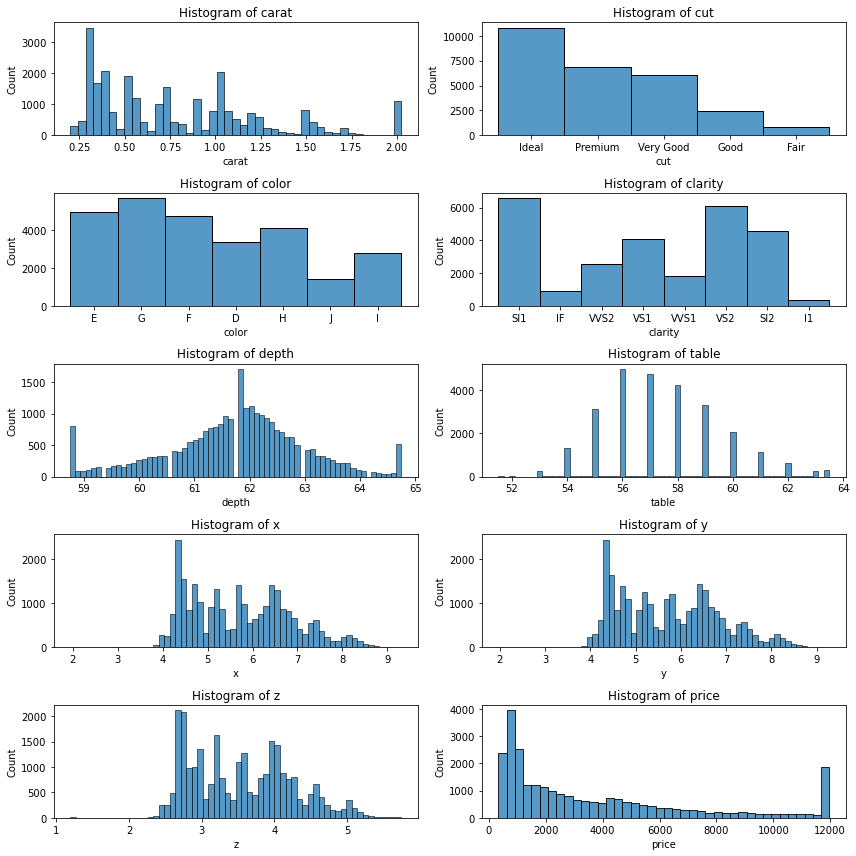

In [29]:
plt.figure(figsize = (12,12))
feature_list = zirconia.columns
for i in range(len(feature_list)):
    plt.subplot(5,2, i + 1)
    sns.histplot(x = zirconia[feature_list[i]], data = zirconia)
    plt.title('Histogram of {}'.format(feature_list[i])) 
    plt.tight_layout()

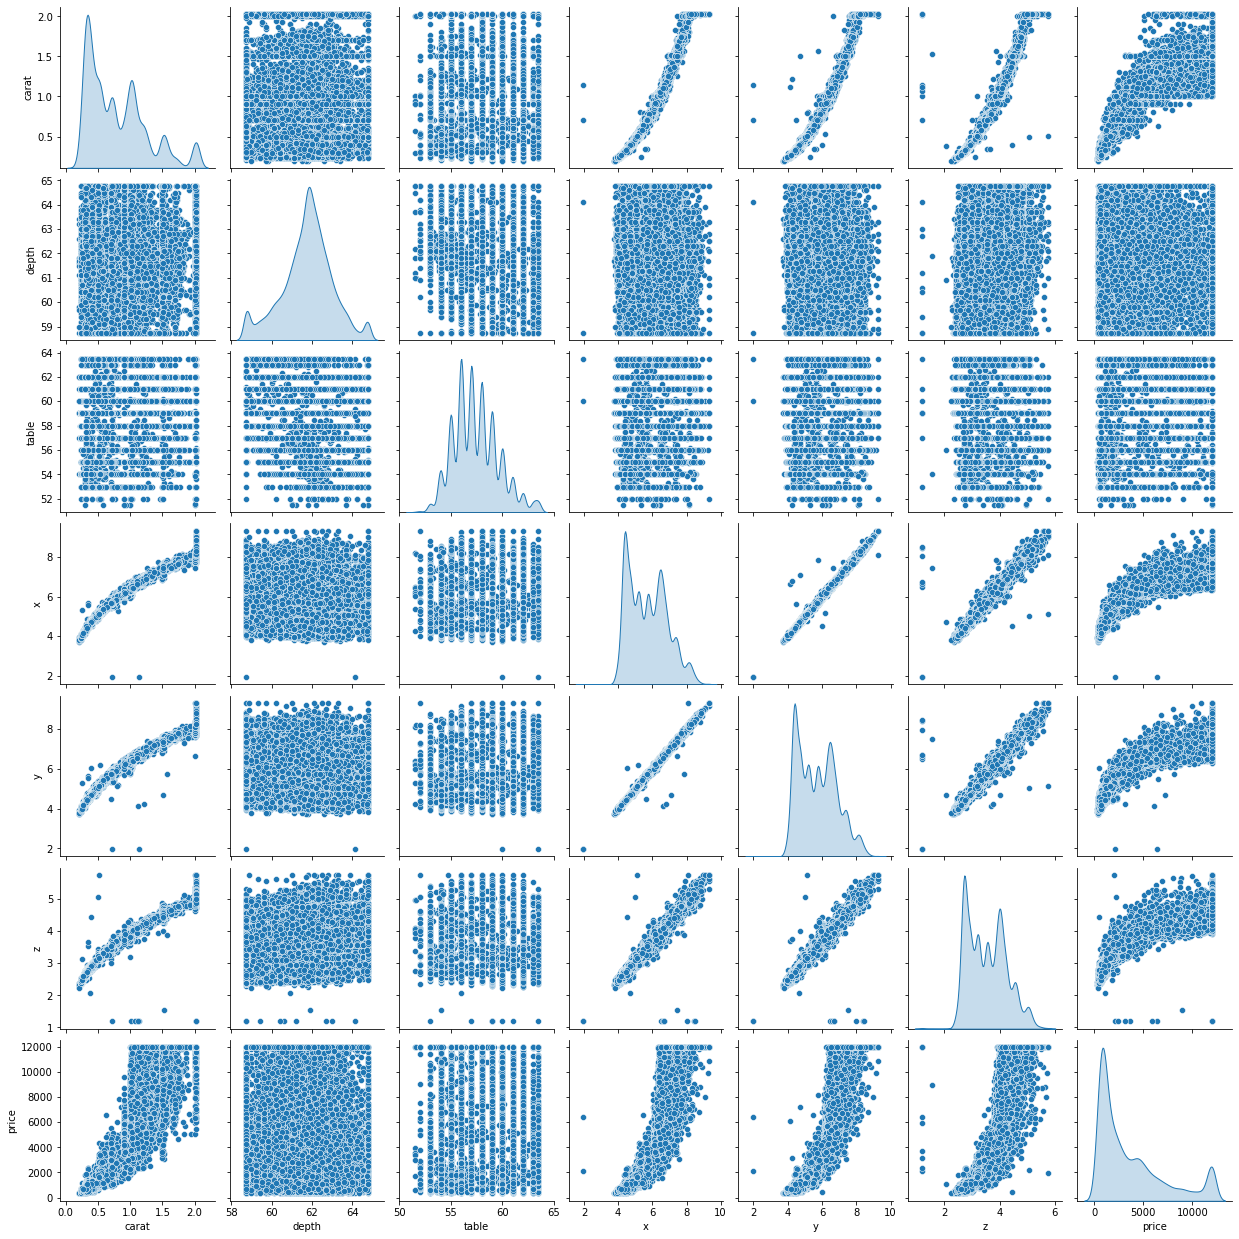

In [31]:
df_attr = (zirconia[cont])
sns.pairplot(df_attr, diag_kind='kde')  
plt.show()

<AxesSubplot:xlabel='price', ylabel='cut'>

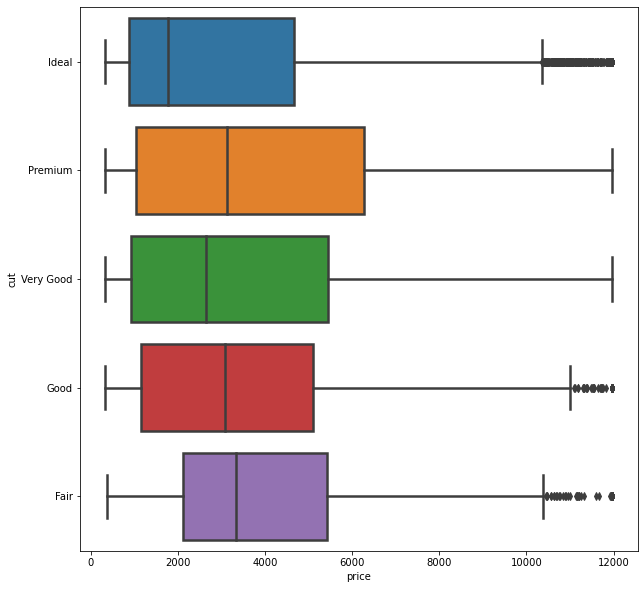

In [32]:
plt.figure(figsize=(10, 10))  
sns.boxplot(data=zirconia, x ='price' , y = 'cut', linewidth=2.5) 

<AxesSubplot:xlabel='price', ylabel='color'>

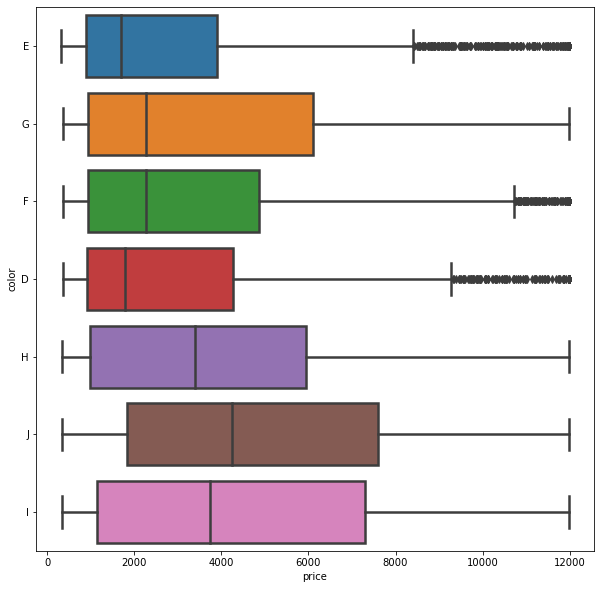

In [33]:
plt.figure(figsize=(10, 10))  
sns.boxplot(data=zirconia, x ='price' , y = 'color', linewidth=2.5) 

<AxesSubplot:xlabel='price', ylabel='clarity'>

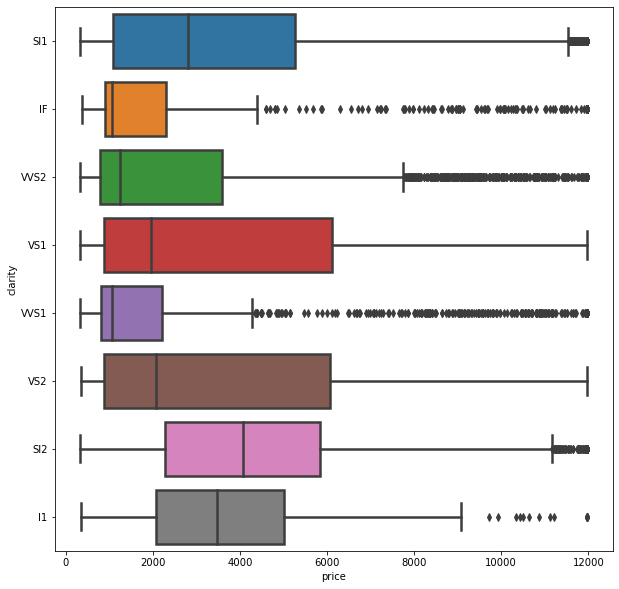

In [34]:
plt.figure(figsize=(10, 10))  
sns.boxplot(data=zirconia, x ='price' , y = 'clarity', linewidth=2.5) 

**Encode the Data**

In [30]:
for column in zirconia.columns:
    if zirconia[column].dtype == 'object':
        print(column.upper(),': ',zirconia[column].nunique())
        print(zirconia[column].value_counts().sort_values())
        print('\n')

CUT :  5
Fair           780
Good          2435
Very Good     6027
Premium       6886
Ideal        10805
Name: cut, dtype: int64


COLOR :  7
J    1440
I    2765
D    3341
H    4095
F    4723
E    4916
G    5653
Name: color, dtype: int64


CLARITY :  8
I1       364
IF       891
VVS1    1839
VVS2    2530
VS1     4087
SI2     4564
VS2     6093
SI1     6565
Name: clarity, dtype: int64




**Converting all objects to categorical codes**

In [31]:
zirconia['cut']=np.where(zirconia['cut'] =='Fair', '1', zirconia['cut'])
zirconia['cut']=np.where(zirconia['cut'] =='Good', '1', zirconia['cut'])
zirconia['cut']=np.where(zirconia['cut'] =='Very Good', '2', zirconia['cut'])
zirconia['cut']=np.where(zirconia['cut'] =='Premium', '3', zirconia['cut'])
zirconia['cut']=np.where(zirconia['cut'] =='Ideal', '4', zirconia['cut'])

In [32]:
zirconia['color']=np.where(zirconia['color'] =='D', '1', zirconia['color'])
zirconia['color']=np.where(zirconia['color'] =='E', '2', zirconia['color'])
zirconia['color']=np.where(zirconia['color'] =='F', '3', zirconia['color'])
zirconia['color']=np.where(zirconia['color'] =='G', '4', zirconia['color'])
zirconia['color']=np.where(zirconia['color'] =='H', '5', zirconia['color'])
zirconia['color']=np.where(zirconia['color'] =='I', '6', zirconia['color'])
zirconia['color']=np.where(zirconia['color'] =='J', '6', zirconia['color'])

In [33]:
zirconia['clarity']=np.where(zirconia['clarity'] =='IF', '1', zirconia['clarity'])
zirconia['clarity']=np.where(zirconia['clarity'] =='VVS1', '1', zirconia['clarity'])
zirconia['clarity']=np.where(zirconia['clarity'] =='VVS2', '1', zirconia['clarity'])
zirconia['clarity']=np.where(zirconia['clarity'] =='VS1', '2', zirconia['clarity'])
zirconia['clarity']=np.where(zirconia['clarity'] =='VS2', '3', zirconia['clarity'])
zirconia['clarity']=np.where(zirconia['clarity'] =='SI1', '4', zirconia['clarity'])
zirconia['clarity']=np.where(zirconia['clarity'] =='SI2', '5', zirconia['clarity'])
zirconia['clarity']=np.where(zirconia['clarity'] =='I1', '5', zirconia['clarity'])

In [34]:
zirconia.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26933 entries, 0 to 26966
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    26933 non-null  float64
 1   cut      26933 non-null  object 
 2   color    26933 non-null  object 
 3   clarity  26933 non-null  object 
 4   depth    26933 non-null  float64
 5   table    26933 non-null  float64
 6   x        26933 non-null  float64
 7   y        26933 non-null  float64
 8   z        26933 non-null  float64
 9   price    26933 non-null  float64
dtypes: float64(7), object(3)
memory usage: 2.3+ MB


In [35]:
for column in zirconia.columns:
    if zirconia[column].dtype == 'object':
        print(column.upper(),': ',zirconia[column].nunique())
        print(zirconia[column].value_counts().sort_values())
        print('\n')

CUT :  4
1     3215
2     6027
3     6886
4    10805
Name: cut, dtype: int64


COLOR :  6
1    3341
5    4095
6    4205
3    4723
2    4916
4    5653
Name: color, dtype: int64


CLARITY :  5
2    4087
5    4928
1    5260
3    6093
4    6565
Name: clarity, dtype: int64




In [36]:
zirconia.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.30,4,2,4,62.1,58.0,4.27,4.29,2.66,499.0
1,0.33,3,4,1,60.8,58.0,4.42,4.46,2.70,984.0
2,0.90,2,2,1,62.2,60.0,6.04,6.12,3.78,6289.0
3,0.42,4,3,2,61.6,56.0,4.82,4.80,2.96,1082.0
4,0.31,4,3,1,60.4,59.0,4.35,4.43,2.65,779.0


In [37]:
zirconia.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26933 entries, 0 to 26966
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    26933 non-null  float64
 1   cut      26933 non-null  object 
 2   color    26933 non-null  object 
 3   clarity  26933 non-null  object 
 4   depth    26933 non-null  float64
 5   table    26933 non-null  float64
 6   x        26933 non-null  float64
 7   y        26933 non-null  float64
 8   z        26933 non-null  float64
 9   price    26933 non-null  float64
dtypes: float64(7), object(3)
memory usage: 2.3+ MB


In [38]:
## Converting object variable to numeric
zirconia['cut'] = zirconia['cut'].astype('int64')
zirconia['color'] = zirconia['color'].astype('int64')
zirconia['clarity'] = zirconia['clarity'].astype('int64')
zirconia.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26933 entries, 0 to 26966
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    26933 non-null  float64
 1   cut      26933 non-null  int64  
 2   color    26933 non-null  int64  
 3   clarity  26933 non-null  int64  
 4   depth    26933 non-null  float64
 5   table    26933 non-null  float64
 6   x        26933 non-null  float64
 7   y        26933 non-null  float64
 8   z        26933 non-null  float64
 9   price    26933 non-null  float64
dtypes: float64(7), int64(3)
memory usage: 2.3 MB


**Train Test Split**

In [39]:
# Copy all the predictor variables into X dataframe
X = zirconia.drop('price', axis=1)

# Copy target into the y dataframe. 
y = pd.DataFrame(zirconia['price'])

In [40]:
# Split X and y into training and test set in 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=1)

**Linear Regression Model**

In [41]:
# invoke the LinearRegression function and find the bestfit model on training data

regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

LinearRegression()

In [42]:
regression_model.coef_

array([[ 8868.5513771 ,   102.18138342,  -280.50567221,  -528.7688476 ,
          -18.31635716,   -19.23218092, -1485.29256405,  1315.21543108,
         -343.28800778]])

In [43]:
# Let us explore the coefficients for each of the independent attributes

for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

The coefficient for carat is 8868.551377103391
The coefficient for cut is 102.18138341850195
The coefficient for color is -280.5056722051234
The coefficient for clarity is -528.7688475951353
The coefficient for depth is -18.31635716114283
The coefficient for table is -19.232180922453864
The coefficient for x is -1485.2925640512822
The coefficient for y is 1315.2154310824542
The coefficient for z is -343.2880077837371


In [44]:
# Let us check the intercept for the model

intercept = regression_model.intercept_

print("The intercept for our model is {}".format(intercept))

The intercept for our model is [3444.38349854]


In [45]:
regression_model.score(X_train, y_train)

0.9304687791360235

In [46]:
# Model score - R2 or coeff of determinant
# R^2=1–RSS / TSS =  RegErr / TSS

regression_model.score(X_test, y_test)

0.9304494390891348

In [47]:


#mse = np.mean((regression_model.predict(X_test)-y_test)**2)

In [48]:
# underroot of mean_sq_error is standard deviation i.e. avg variance between predicted and actual

#import math

#math.sqrt(mse)

In [49]:

y_pred = regression_model.predict(X_test)

In [50]:
#RMSE on Testing data
np.sqrt(metrics.mean_squared_error(y_test,y_pred))

916.1755848526209

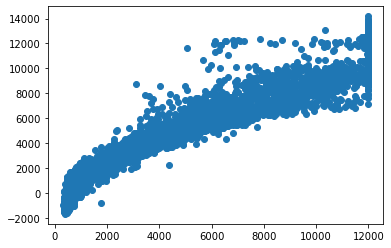

In [51]:
plt.scatter(y_test, y_pred)

**Statsmodel library to get R type outputs**

In [52]:
data_train = pd.concat([X_train, y_train], axis=1)
data_train.head()


,carat,cut,color,clarity,depth,table,x,y,z,price
22114,0.34,2,5,3,62.4,60.0,4.41,4.44,2.76,537.0
2275,0.30,4,2,3,61.2,55.0,4.35,4.31,2.65,844.0
19183,0.50,4,4,4,62.5,57.0,5.09,5.05,3.17,1240.0
5030,1.10,1,2,5,63.3,56.0,6.53,6.58,4.15,4065.0
25414,1.02,3,3,5,61.1,62.0,6.54,6.49,3.98,4057.0


In [53]:
import statsmodels.formula.api as smf
lm1 = smf.ols(formula= 'price ~ carat+cut+color+clarity+depth+table+x+y+z', data = data_train).fit()
lm1.params

Intercept    3444.383499
carat        8868.551377
cut           102.181383
color        -280.505672
clarity      -528.768848
depth         -18.316357
table         -19.232181
x           -1485.292564
y            1315.215431
z            -343.288008
dtype: float64

In [54]:
print(lm1.summary())  #Inferential statistics

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.930
Model:                            OLS   Adj. R-squared:                  0.930
Method:                 Least Squares   F-statistic:                 2.802e+04
Date:                Sat, 18 Jun 2022   Prob (F-statistic):               0.00
Time:                        17:01:59   Log-Likelihood:            -1.5528e+05
No. Observations:               18853   AIC:                         3.106e+05
Df Residuals:                   18843   BIC:                         3.107e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   3444.3835    697.259      4.940      0.0

In [57]:
data_train.drop('price',axis=1).shape

(18853, 9)

In [58]:
data_train['price'].shape

(18853,)

In [55]:
# Calculate MSE
mse = np.mean((lm1.predict(data_train.drop('price',axis=1))-data_train['price'])**2)

In [56]:
#Root Mean Squared Error - RMSE
np.sqrt(mse)

913.8453056702992

In [65]:
data_test=pd.concat([X_test,y_test],axis=1)

In [66]:
# Prediction on Test data
y_pred = lm1.predict(data_test)

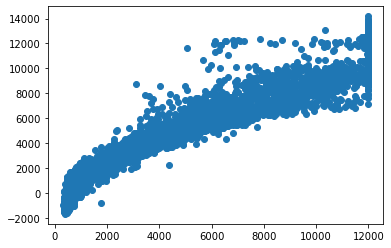

In [67]:
plt.scatter(y_test['price'],y_pred)
plt.show()

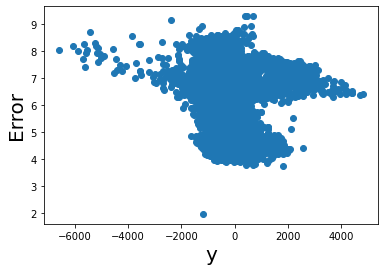

In [68]:
plt.scatter((y_test['price']-y_pred), data_test['y'])
plt.xlabel('y',fontsize = 20)
plt.ylabel('Error',fontsize = 20)
plt.show()

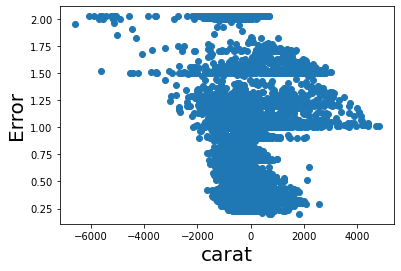

In [69]:
plt.scatter((y_test['price']-y_pred), data_test['carat'])
plt.xlabel('carat',fontsize = 20)
plt.ylabel('Error',fontsize = 20)
plt.show()

In [70]:
for i,j in np.array(lm1.params.reset_index()):
    print('({}) * {} +'.format(round(j,2),i),end=' ')

(3444.38) * Intercept + (8868.55) * carat + (102.18) * cut + (-280.51) * color + (-528.77) * clarity + (-18.32) * depth + (-19.23) * table + (-1485.29) * x + (1315.22) * y + (-343.29) * z + 

**Linear Regression using scaled variables**

In [71]:
from scipy.stats import zscore

X_train_scaled  = X_train.apply(zscore)
X_test_scaled = X_test.apply(zscore)
y_train_scaled = y_train.apply(zscore)
y_test_scaled = y_test.apply(zscore)


In [72]:
# invoke the LinearRegression function and find the bestfit model on training data

regression_model = LinearRegression()
regression_model.fit(X_train_scaled, y_train_scaled)

LinearRegression()

In [73]:
# Let us explore the coefficients for each of the independent attributes

for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

The coefficient for carat is 1.1774422658429102
The coefficient for cut is 0.03076747350412191
The coefficient for color is -0.13037317070929832
The coefficient for clarity is -0.2110276023552467
The coefficient for depth is -0.006524643435114395
The coefficient for table is -0.011951257122052904
The coefficient for x is -0.48092305652675993
The coefficient for y is 0.4229057795484819
The coefficient for z is -0.06877372886083429


In [74]:
intercept = regression_model.intercept_
intercept

array([-1.27204211e-16])

In [75]:
# Model score - R2 or coeff of determinant
# R^2=1–RSS / TSS

regression_model.score(X_test_scaled, y_test_scaled)

0.9304370839514177

In [76]:
# Let us check the sum of squared errors by predicting value of y for training cases and 
# subtracting from the actual y for the training cases

mse = np.mean((regression_model.predict(X_test_scaled)-y_test_scaled)**2)

In [77]:
# underroot of mean_sq_error is standard deviation i.e. avg variance between predicted and actual

import math

math.sqrt(mse)

0.26374782662342916

In [78]:
# predict price for a set of attributes not in the training or test set
y_pred = regression_model.predict(X_test_scaled)

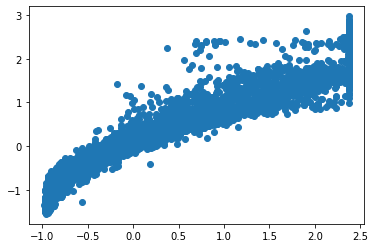

In [79]:
# Since this is regression, plot the predicted y value vs actual y values for the test data
# A good model's prediction will be close to actual leading to high R and R2 values
plt.scatter(y_test_scaled['price'], y_pred)

In [80]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [81]:
vif = [variance_inflation_factor(X.values, ix) for ix in range(X.shape[1])] 

In [82]:
i=0
for column in X.columns:
    if i < 11:
        print (column ,"--->",  vif[i])
        i = i+1


carat ---> 112.47704247034484
cut ---> 10.9098291166638
color ---> 6.526285702696389
clarity ---> 7.263592094796288
depth ---> 948.2413586782313
table ---> 756.6313138934046
x ---> 10375.773088992692
y ---> 9276.755499118944
z ---> 1973.0091251713475


**Linear Regression by dropping few variables which are having high correlation**

In [83]:
# Copy all the predictor variables into X dataframe
X1 = zirconia.drop(['price','x','z','depth'], axis=1)

# Copy target into the y dataframe. 
y1 = pd.DataFrame(zirconia['price'])

In [84]:
# Split X and y into training and test set in 70:30 ratio
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.30 , random_state=1)

In [85]:
# invoke the LinearRegression function and find the bestfit model on training data

regression_model1 = LinearRegression()
regression_model1.fit(X_train1, y_train1)

LinearRegression()

In [86]:
regression_model1.coef_

array([[8478.39379599,  108.64756578, -281.53492036, -540.80864594,
         -15.45318877, -225.89351737]])

In [87]:
# Let us explore the coefficients for each of the independent attributes

for idx, col_name in enumerate(X_train1.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model1.coef_[0][idx]))

The coefficient for carat is 8478.393795989925
The coefficient for cut is 108.64756577773537
The coefficient for color is -281.5349203584063
The coefficient for clarity is -540.8086459429592
The coefficient for table is -15.453188765595609
The coefficient for y is -225.89351737003344


In [88]:
# Let us check the intercept for the model

intercept = regression_model1.intercept_

print("The intercept for our model is {}".format(intercept))

The intercept for our model is [1535.74615467]


In [89]:
regression_model1.score(X_train1, y_train1)

0.9295509839520539

In [90]:
# Model score - R2 or coeff of determinant
# R^2=1–RSS / TSS =  RegErr / TSS

regression_model1.score(X_test1, y_test1)

0.9294274488811725

### Problem 2: Logistic Regression and LDA

You are hired by a tour and travel agency which deals in selling holiday packages. You are provided details of 872 employees of a company. Among these employees, some opted for the package and some didn't. You have to help the company in predicting whether an employee will opt for the package or not on the basis of the information given in the data set. Also, find out the important factors on the basis of which the company will focus on particular employees to sell their packages.

Data Dictionary:

**Variable Name :**	     Description

**Holiday_Package :** 	 Opted for Holiday Package yes/no?

**Salary :**	         Employee salary

**age :** 	             Age in years

**edu :** 	             Years of formal education

**no_young_children :**  The number of young children (younger than 7 years)

**no_older_children :**	 Number of older children

**foreign :** 	         foreigner Yes/No


In [350]:
holiday = pd.read_csv('Holiday_Package.csv')

In [351]:
holiday.head()

,Unnamed: 0,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
0,1,no,48412,30,8,1,1,no
1,2,yes,37207,45,8,0,1,no
2,3,no,58022,46,9,0,0,no
3,4,no,66503,31,11,2,0,no
4,5,no,66734,44,12,0,2,no


In [352]:
holiday.drop('Unnamed: 0',axis=1,inplace=True)

In [353]:
#from pandas_profiling import ProfileReport
#report = ProfileReport(holiday)
#report.to_file('Report- Holiday.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [355]:
holiday.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 872 entries, 0 to 871
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Holliday_Package   872 non-null    object
 1   Salary             872 non-null    int64 
 2   age                872 non-null    int64 
 3   educ               872 non-null    int64 
 4   no_young_children  872 non-null    int64 
 5   no_older_children  872 non-null    int64 
 6   foreign            872 non-null    object
dtypes: int64(5), object(2)
memory usage: 47.8+ KB


**Outlier Treatment**

C:\Users\siva\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
<ipython-input-360-929f2fdb8567>:6: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show();
C:\Users\siva\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
<ipython-input-360-929f2fdb8567>:6: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show();
C:\Users\siva\anaconda3\lib\site-packages\seaborn\

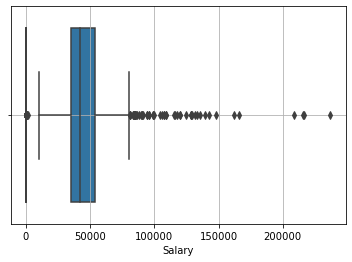

In [360]:
cols = ['age','educ','no_young_children','no_older_children','Salary']
i =0
for i in cols:
    sns.boxplot(holiday[i],whis=1.5)
    plt.grid()
    plt.show();

In [358]:
cont1=holiday.dtypes[(holiday.dtypes!='object')].index
cont1

Index(['Salary', 'age', 'educ', 'no_young_children', 'no_older_children'], dtype='object')

C:\Users\siva\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


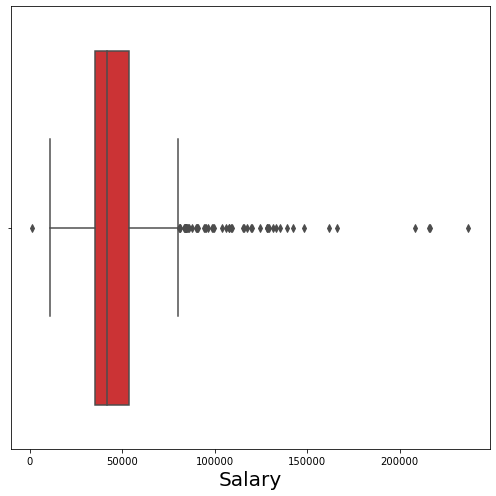

In [359]:

plt.figure(figsize=(7,7))
sns.boxplot(holiday.Salary,palette="Set1")
plt.xlabel(xlabel = 'Salary',fontsize=20)
plt.tight_layout()


In [98]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [99]:
lr,ur=remove_outlier(holiday['Salary'])
print('Lower Range :',lr,'\nUpper Range :',ur)
holiday['Salary']=np.where(holiday['Salary']>ur,ur,holiday['Salary'])
holiday['Salary']=np.where(holiday['Salary']<lr,lr,holiday['Salary'])

Lower Range : 8105.75 
Upper Range : 80687.75


C:\Users\siva\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


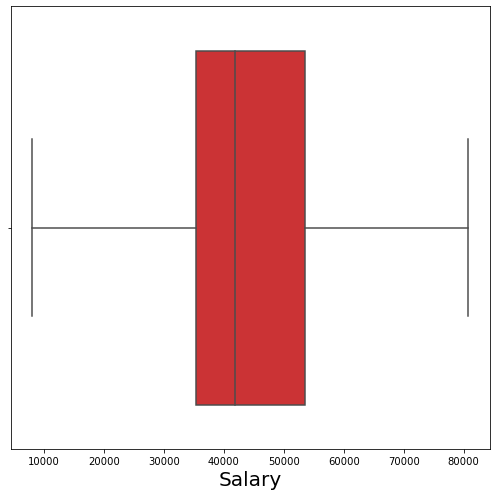

In [100]:
plt.figure(figsize=(7,7))
sns.boxplot(holiday.Salary,palette="Set1")
plt.xlabel(xlabel = 'Salary',fontsize=20)
plt.tight_layout()


In [101]:
holiday.describe()

,Salary,age,educ,no_young_children,no_older_children
count,872.000000,872.000000,872.000000,872.000000,872.000000
mean,45608.336869,39.955275,9.307339,0.311927,0.982798
std,15699.745151,10.551675,3.036259,0.612870,1.086786
min,8105.750000,20.000000,1.000000,0.000000,0.000000
25%,35324.000000,32.000000,8.000000,0.000000,0.000000
50%,41903.500000,39.000000,9.000000,0.000000,1.000000
75%,53469.500000,48.000000,12.000000,0.000000,2.000000
max,80687.750000,62.000000,21.000000,3.000000,6.000000


**Checking for Correlations**

In [102]:
holiday.corr()

,Salary,age,educ,no_young_children,no_older_children
Salary,1.000000,0.047029,0.352726,-0.034360,0.121993
age,0.047029,1.000000,-0.149294,-0.519093,-0.116205
educ,0.352726,-0.149294,1.000000,0.098350,-0.036321
no_young_children,-0.034360,-0.519093,0.098350,1.000000,-0.238428
no_older_children,0.121993,-0.116205,-0.036321,-0.238428,1.000000


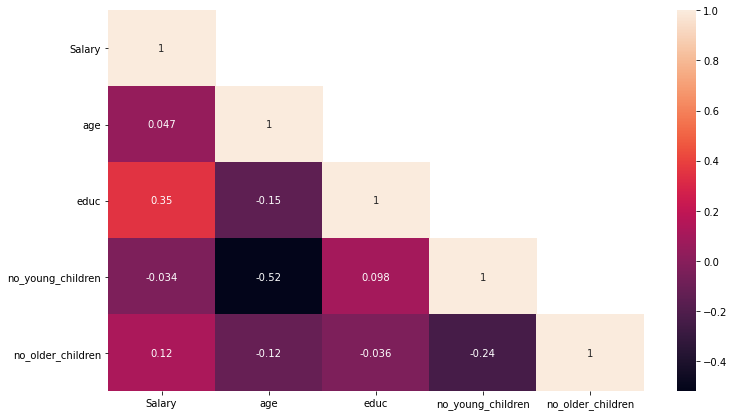

In [103]:
plt.figure(figsize=(12,7))
sns.heatmap(holiday.corr(), annot=True,mask=np.triu(holiday.corr(),+1));

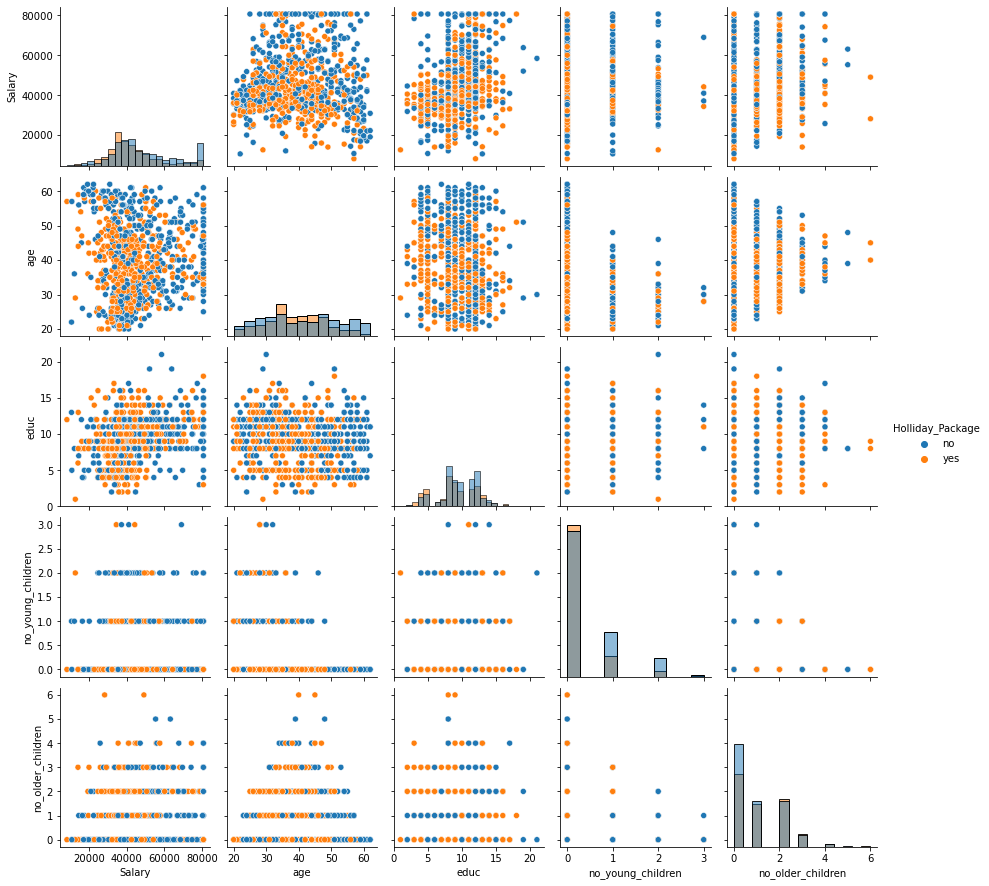

In [104]:
sns.pairplot(holiday,diag_kind='hist' ,hue='Holliday_Package');

<AxesSubplot:xlabel='age', ylabel='count'>

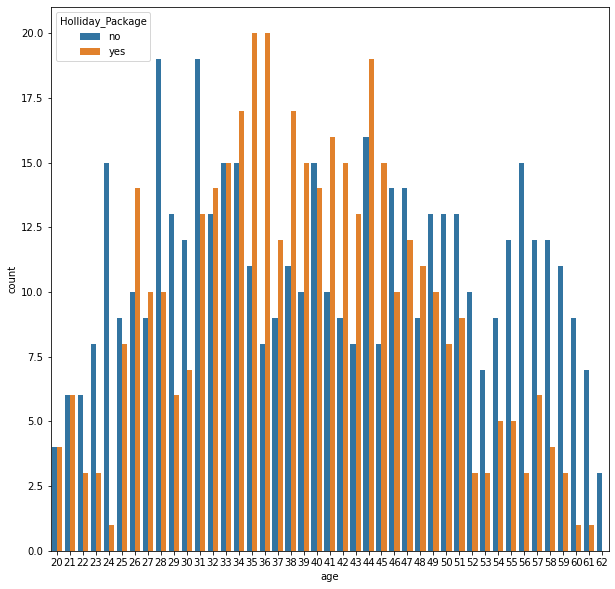

In [362]:
plt.figure(figsize=(10, 10))  
sns.countplot(data=holiday, x ='age' , hue = 'Holliday_Package', linewidth=2.5) 

<AxesSubplot:xlabel='educ', ylabel='count'>

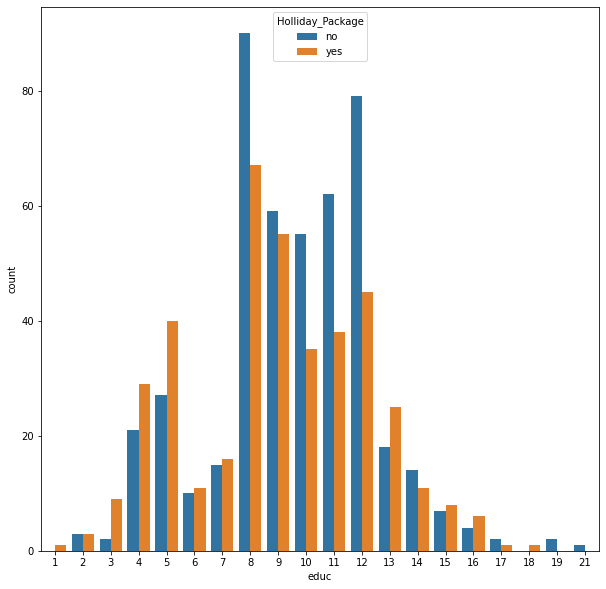

In [363]:
plt.figure(figsize=(10, 10))  
sns.countplot(data=holiday, x ='educ' , hue = 'Holliday_Package', linewidth=2.5) 

<AxesSubplot:xlabel='no_young_children', ylabel='count'>

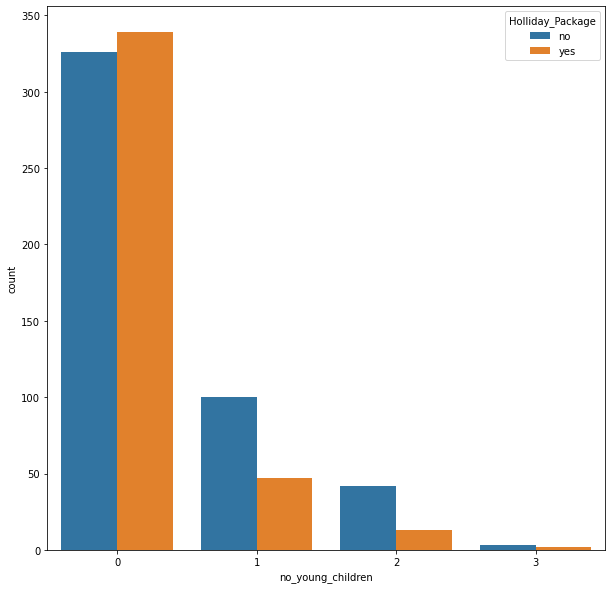

In [364]:
plt.figure(figsize=(10, 10))  
sns.countplot(data=holiday, x ='no_young_children' , hue = 'Holliday_Package', linewidth=2.5) 

<AxesSubplot:xlabel='no_older_children', ylabel='count'>

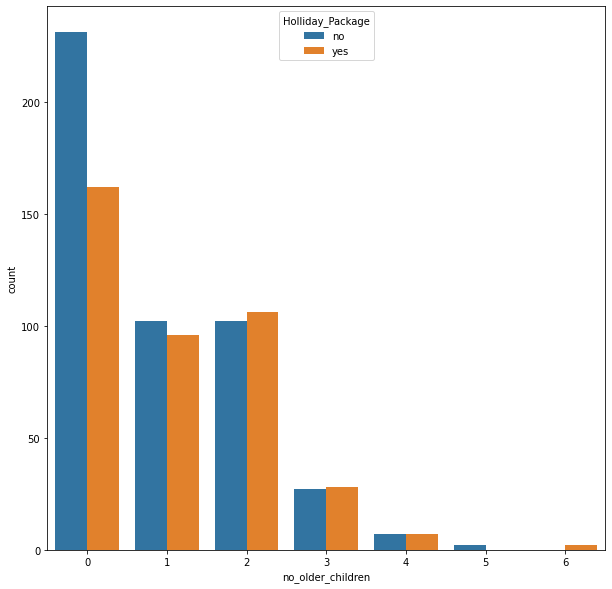

In [365]:
plt.figure(figsize=(10, 10))  
sns.countplot(data=holiday, x ='no_older_children' , hue = 'Holliday_Package', linewidth=2.5) 

<AxesSubplot:xlabel='foreign', ylabel='count'>

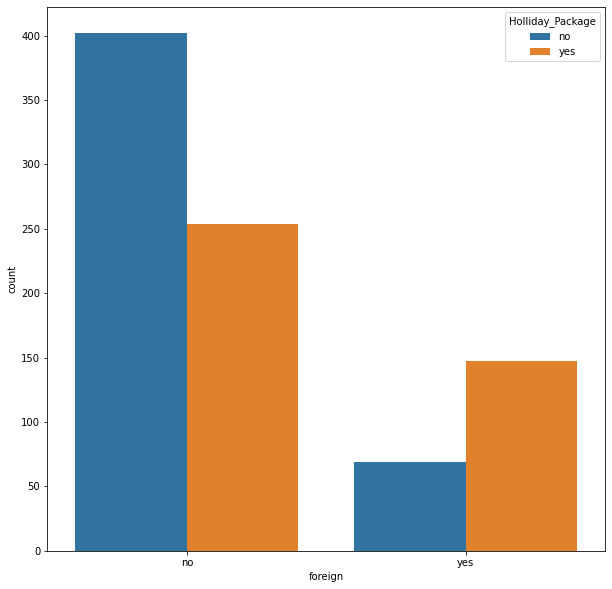

In [366]:
plt.figure(figsize=(10, 10))  
sns.countplot(data=holiday, x ='foreign' , hue = 'Holliday_Package', linewidth=2.5) 

C:\Users\siva\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


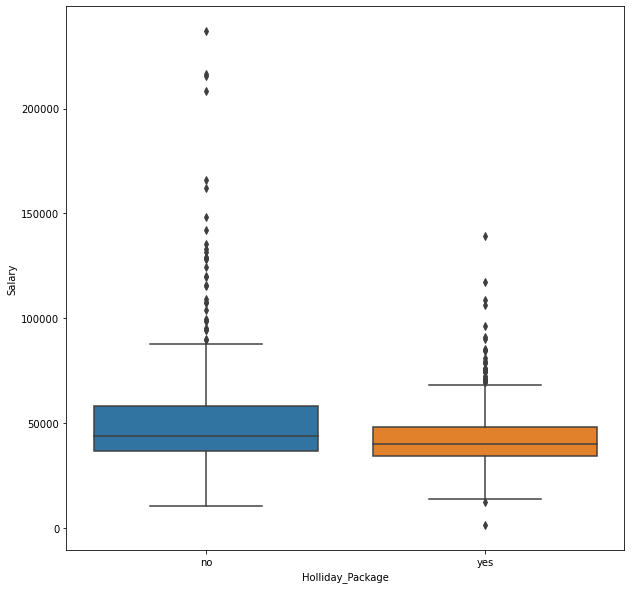

In [368]:
plt.figure(figsize=(10, 10))
sns.boxplot(holiday['Holliday_Package'],holiday['Salary']);

C:\Users\siva\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


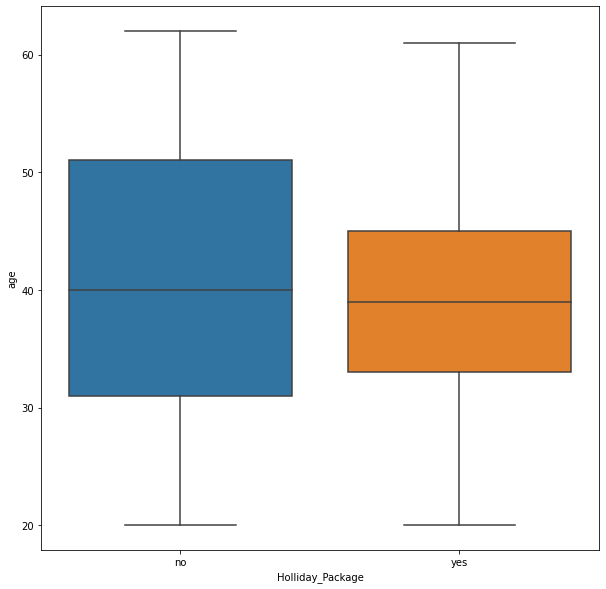

In [369]:
plt.figure(figsize=(10, 10))
sns.boxplot(holiday['Holliday_Package'],holiday['age']);

C:\Users\siva\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


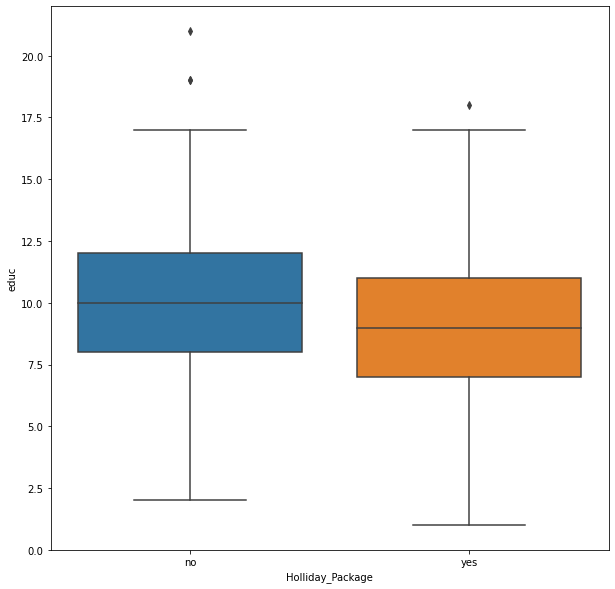

In [370]:
plt.figure(figsize=(10, 10))
sns.boxplot(holiday['Holliday_Package'],holiday['educ']);

C:\Users\siva\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


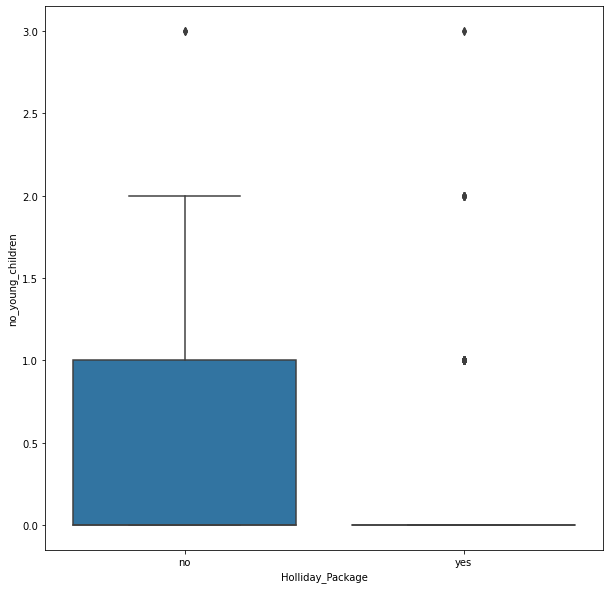

In [371]:
plt.figure(figsize=(10, 10))
sns.boxplot(holiday['Holliday_Package'],holiday['no_young_children']);

C:\Users\siva\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


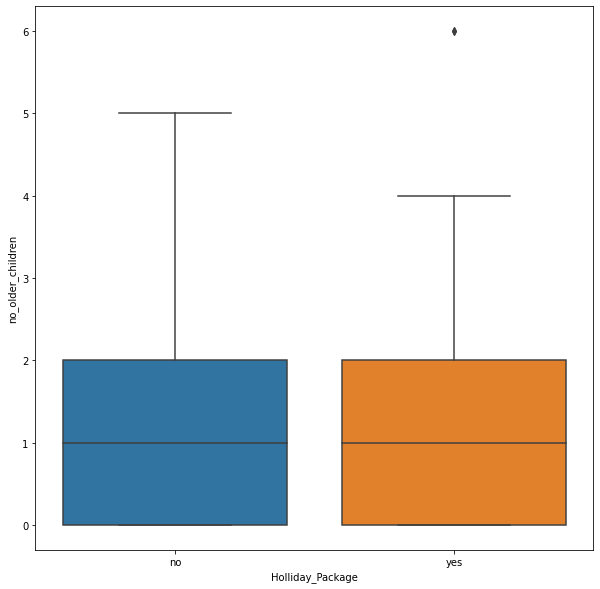

In [372]:
plt.figure(figsize=(10, 10))
sns.boxplot(holiday['Holliday_Package'],holiday['no_older_children']);

In [105]:
holiday.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 872 entries, 0 to 871
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Holliday_Package   872 non-null    object 
 1   Salary             872 non-null    float64
 2   age                872 non-null    int64  
 3   educ               872 non-null    int64  
 4   no_young_children  872 non-null    int64  
 5   no_older_children  872 non-null    int64  
 6   foreign            872 non-null    object 
dtypes: float64(1), int64(4), object(2)
memory usage: 47.8+ KB


**Converting the other 'object' type variables as dummy variables**

In [106]:
## Converting the 'salary' Variable into numeric by using the LabelEncoder functionality inside sklearn.
from sklearn.preprocessing import LabelEncoder

## Defining a Label Encoder object instance
LE = LabelEncoder()

In [107]:
## Applying the created Label Encoder object for the target class
## Assigning the 0 to <=50k and 1 to >50k

holiday['Holliday_Package'] = LE.fit_transform(holiday['Holliday_Package'])
holiday['foreign'] = LE.fit_transform(holiday['foreign'])

holiday.head()

,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
0,0,48412.0,30,8,1,1,0
1,1,37207.0,45,8,0,1,0
2,0,58022.0,46,9,0,0,0
3,0,66503.0,31,11,2,0,0
4,0,66734.0,44,12,0,2,0


In [108]:


holiday_dummy = pd.get_dummies(holiday,drop_first=True)
holiday_dummy.head()

,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
0,0,48412.0,30,8,1,1,0
1,1,37207.0,45,8,0,1,0
2,0,58022.0,46,9,0,0,0
3,0,66503.0,31,11,2,0,0
4,0,66734.0,44,12,0,2,0


In [109]:
holiday_dummy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 872 entries, 0 to 871
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Holliday_Package   872 non-null    int32  
 1   Salary             872 non-null    float64
 2   age                872 non-null    int64  
 3   educ               872 non-null    int64  
 4   no_young_children  872 non-null    int64  
 5   no_older_children  872 non-null    int64  
 6   foreign            872 non-null    int32  
dtypes: float64(1), int32(2), int64(4)
memory usage: 41.0 KB


**Train Test Split**

In [327]:
# Copy all the predictor variables into X dataframe
X = holiday_dummy.drop('Holliday_Package', axis=1)

# Copy target into the y dataframe. 
y = pd.DataFrame(holiday_dummy['Holliday_Package'])

#y = holiday_dummy['Holliday_Package']

In [328]:
# Split X and y into training and test set in 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=1,stratify=holiday_dummy['Holliday_Package'])

In [329]:
y_train.value_counts(normalize = True)

Holliday_Package
0                   0.539344
1                   0.460656
dtype: float64

In [330]:
y_test.value_counts(normalize = True)

Holliday_Package
0                   0.541985
1                   0.458015
dtype: float64

**Logistic Regression Model**

In [331]:
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix

In [332]:
# Fit the Logistic Regression model
model = LogisticRegression(solver='newton-cg',max_iter=10000,penalty='none',verbose=True,n_jobs=2)
model.fit(X_train, y_train)

C:\Users\siva\AppData\Roaming\Python\Python38\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:    1.1s finished


LogisticRegression(max_iter=10000, n_jobs=2, penalty='none', solver='newton-cg',
                   verbose=True)

**Predicting on Training and Test dataset**

In [333]:
ytrain_predict = model.predict(X_train)
ytest_predict = model.predict(X_test)

**Getting the Predicted Classes and Probs**

In [334]:
X_test.shape

(262, 6)

In [335]:
ytest_predict_prob=model.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob).head(10)

,0,1
0,0.677845,0.322155
1,0.534493,0.465507
2,0.691845,0.308155
3,0.487745,0.512255
4,0.571939,0.428061
5,0.328292,0.671708
6,0.564418,0.435582
7,0.302416,0.697584
8,0.379309,0.620691
9,0.599359,0.400641


In [336]:
y_test.head(10)

,Holliday_Package
264,1
189,0
643,0
65,1
241,0
31,0
259,0
695,1
764,1
646,0


In [337]:
# Accuracy - Training Data
model.score(X_train, y_train)

0.6672131147540984

In [338]:
model.score(X_test, y_test)

0.648854961832061

**AUC and ROC for the training data**

AUC: 0.733


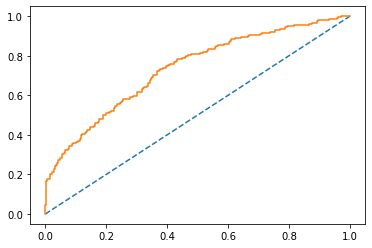

In [339]:
# predict probabilities
probs = model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

**AUC and ROC for the test data**

AUC: 0.733


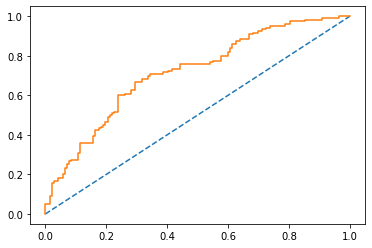

In [340]:
# predict probabilities
probs = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

**Confusion Matrix for the training data**

In [341]:
confusion_matrix(y_train, ytrain_predict)

array([[244,  85],
       [118, 163]], dtype=int64)

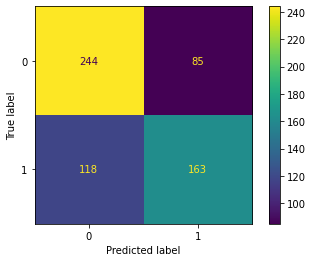

In [342]:
plot_confusion_matrix(model,X_train,y_train);

In [343]:
print(classification_report(y_train, ytrain_predict))

              precision    recall  f1-score   support

           0       0.67      0.74      0.71       329
           1       0.66      0.58      0.62       281

    accuracy                           0.67       610
   macro avg       0.67      0.66      0.66       610
weighted avg       0.67      0.67      0.66       610



**Confusion Matrix for test data**

In [344]:
confusion_matrix(y_test, ytest_predict)

array([[108,  34],
       [ 58,  62]], dtype=int64)

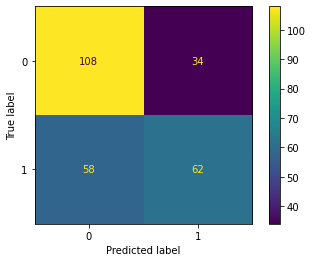

In [345]:
plot_confusion_matrix(model,X_test,y_test);

In [346]:
print(classification_report(y_test, ytest_predict))

              precision    recall  f1-score   support

           0       0.65      0.76      0.70       142
           1       0.65      0.52      0.57       120

    accuracy                           0.65       262
   macro avg       0.65      0.64      0.64       262
weighted avg       0.65      0.65      0.64       262



**Applying GridSearchCV for Logistic Regression**

In [287]:
grid={'C': [0.001,0.01,0.1,1],
      'solver':['saga','newton-cg'],
      'tol':[0.0001,0.00001]}

In [288]:
model = LogisticRegression(max_iter=10000,n_jobs=2)

In [289]:
grid_search = GridSearchCV(estimator = model, param_grid = grid, cv = 3,n_jobs=-1)

In [290]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=LogisticRegression(max_iter=10000, n_jobs=2),
             n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1],
                         'solver': ['saga', 'newton-cg'],
                         'tol': [0.0001, 1e-05]})

In [291]:
print(grid_search.best_params_,'\n')
print(grid_search.best_estimator_)

{'C': 1, 'solver': 'newton-cg', 'tol': 0.0001} 

LogisticRegression(C=1, max_iter=10000, n_jobs=2, solver='newton-cg')


In [292]:
best_model = grid_search.best_estimator_

In [293]:
# Prediction on the training set

ytrain_predict = best_model.predict(X_train)
ytest_predict = best_model.predict(X_test)

In [294]:
## Getting the probabilities on the test set

ytest_predict_prob=best_model.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob).head()

,0,1
0,0.672166,0.327834
1,0.529350,0.470650
2,0.686277,0.313723
3,0.481848,0.518152
4,0.567935,0.432065


              precision    recall  f1-score   support

           0       0.68      0.75      0.71       329
           1       0.66      0.58      0.62       281

    accuracy                           0.67       610
   macro avg       0.67      0.66      0.66       610
weighted avg       0.67      0.67      0.67       610
 



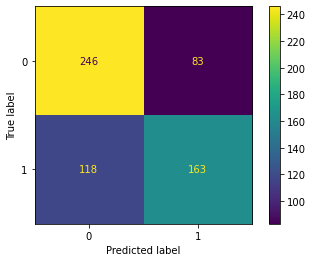

In [295]:
## Confusion matrix on the training data

plot_confusion_matrix(best_model,X_train,y_train)
print(classification_report(y_train, ytrain_predict),'\n');

              precision    recall  f1-score   support

           0       0.65      0.76      0.70       142
           1       0.65      0.53      0.58       120

    accuracy                           0.65       262
   macro avg       0.65      0.64      0.64       262
weighted avg       0.65      0.65      0.65       262
 



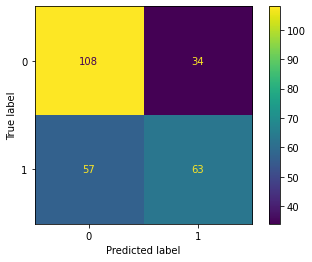

In [296]:
## Confusion matrix on the test data

plot_confusion_matrix(best_model,X_test,y_test)
print(classification_report(y_test, ytest_predict),'\n');

(0.0, 1.0)

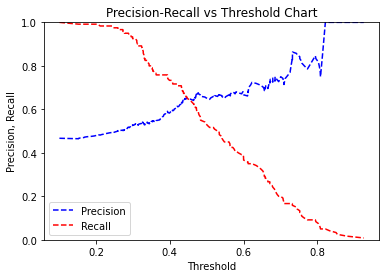

In [266]:
### Predict test_y values and probabilities based on fitted logistic 
pred_y=best_model.predict(X_test) 

probs_y=best_model.predict_proba(X_test) 
  # probs_y is a 2-D array of probability of being labeled as 0 (first 
 # column of array) vs 1 (2nd column in array)

from sklearn.metrics import precision_recall_curve
precision, recall, thresholds = precision_recall_curve(y_test, probs_y[:,1]) 
   #retrieve probability of being 1(in second column of probs_y)
pr_auc = metrics.auc(recall, precision)

plt.title("Precision-Recall vs Threshold Chart")
plt.plot(thresholds, precision[: -1], "b--", label="Precision")
plt.plot(thresholds, recall[: -1], "r--", label="Recall")
plt.ylabel("Precision, Recall")
plt.xlabel("Threshold")
plt.legend(loc="lower left")
plt.ylim([0,1])


The below codes are referred from 

https://towardsdatascience.com/calculating-and-setting-thresholds-to-optimise-logistic-regression-performance-c77e6d112d7e

In [310]:
class LogisticRegressionwithThreshold(LogisticRegression):
    def predict(self, X, threshold=None):
        if threshold == None: # If no threshold passed in, simply call the base class predict, effectively threshold=0.5
            return LogisticRegression.predict(self, X)
        else:
            y_scores = LogisticRegression.predict_proba(self, X)[:, 1]
            y_pred_with_threshold = (y_scores >= threshold).astype(int)

            return y_pred_with_threshold
    
    def threshold_from_optimal_tpr_minus_fpr(self, X, y):
        y_scores = LogisticRegression.predict_proba(self, X)[:, 1]
        fpr, tpr, thresholds = roc_curve(y, y_scores) 

        optimal_idx = np.argmax(tpr - fpr)

        return thresholds[optimal_idx], tpr[optimal_idx] - fpr[optimal_idx]

In [311]:

lrt = LogisticRegressionwithThreshold()
lrt.fit(X_train, y_train)

threshold, optimal_tpr_minus_fpr = lrt.threshold_from_optimal_tpr_minus_fpr(X_train, y_train)
y_pred = lrt.predict(X_train, threshold)

threshold, optimal_tpr_minus_fpr

C:\Users\siva\AppData\Roaming\Python\Python38\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


(0.43746481649180674, 0.17434477387532576)

**LDA Model**

In [315]:
clf = LinearDiscriminantAnalysis()
model=clf.fit(X_train,y_train)

C:\Users\siva\AppData\Roaming\Python\Python38\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


**Prediction by LDA**

In [316]:
# Training Data Class Prediction with a cut-off value of 0.5
pred_class_train = model.predict(X_train)

# Test Data Class Prediction with a cut-off value of 0.5
pred_class_test = model.predict(X_test)

**Training Data and Test Data Confusion Matrix Comparison**

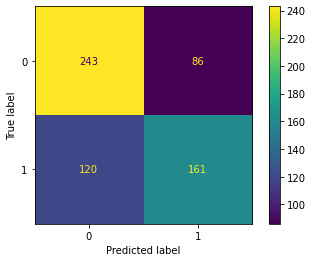

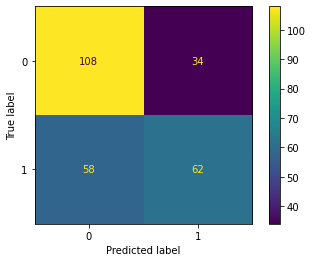

In [317]:
plot_confusion_matrix(model,X_train,y_train)
plot_confusion_matrix(model,X_test,y_test)

In [318]:
print('Classification Report of the training data:\n\n',metrics.classification_report(y_train,pred_class_train),'\n')
print('Classification Report of the test data:\n\n',metrics.classification_report(y_test,pred_class_test),'\n')

Classification Report of the training data:

               precision    recall  f1-score   support

           0       0.67      0.74      0.70       329
           1       0.65      0.57      0.61       281

    accuracy                           0.66       610
   macro avg       0.66      0.66      0.66       610
weighted avg       0.66      0.66      0.66       610
 

Classification Report of the test data:

               precision    recall  f1-score   support

           0       0.65      0.76      0.70       142
           1       0.65      0.52      0.57       120

    accuracy                           0.65       262
   macro avg       0.65      0.64      0.64       262
weighted avg       0.65      0.65      0.64       262
 



**Probability prediction for the training and test data**

In [319]:
# Training Data Probability Prediction
pred_prob_train = model.predict_proba(X_train)

# Test Data Probability Prediction
pred_prob_test = model.predict_proba(X_test)

In [320]:
pred_prob_train[:,1]

array([0.73381047, 0.28335139, 0.39602227, 0.75811139, 0.47077503,
       0.40288832, 0.36938597, 0.30429271, 0.60511549, 0.64331779,
       0.23236876, 0.25905352, 0.35870658, 0.04481746, 0.28052157,
       0.36436459, 0.54805152, 0.30607846, 0.58596151, 0.66087477,
       0.62864901, 0.26524013, 0.88183311, 0.3339946 , 0.08650304,
       0.82610447, 0.19401889, 0.75721542, 0.53138081, 0.1884556 ,
       0.29545808, 0.33809258, 0.3786442 , 0.3805076 , 0.31248766,
       0.29335095, 0.10970912, 0.56057784, 0.48145587, 0.19510252,
       0.22664102, 0.79936112, 0.5017598 , 0.73936151, 0.7906696 ,
       0.36957611, 0.30401273, 0.93317999, 0.43207603, 0.72243241,
       0.71571829, 0.45361505, 0.78697249, 0.3732299 , 0.19256563,
       0.74061067, 0.25056989, 0.51469343, 0.67344556, 0.35368416,
       0.61007438, 0.52767641, 0.52194835, 0.41031873, 0.56904209,
       0.61659997, 0.1237378 , 0.56414678, 0.40272604, 0.27648254,
       0.33165029, 0.74716143, 0.77838017, 0.21902504, 0.44569

AUC for the Training Data: 0.731
AUC for the Test Data: 0.714


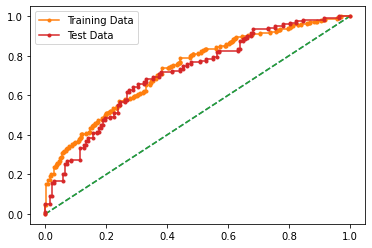

In [321]:
# AUC and ROC for the training data

# calculate AUC
auc = metrics.roc_auc_score(y_train,pred_prob_train[:,1])
print('AUC for the Training Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_train,pred_prob_train[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')


# AUC and ROC for the test data

# calculate AUC
auc = metrics.roc_auc_score(y_test,pred_prob_test[:,1])
print('AUC for the Test Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_test,pred_prob_test[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

0.1 

Accuracy Score 0.4738
F1 Score 0.6356 

Confusion Matrix


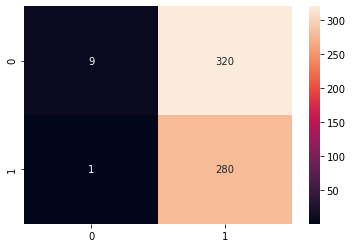

0.2 

Accuracy Score 0.523
F1 Score 0.6498 

Confusion Matrix


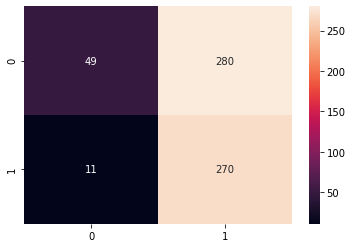

0.3 

Accuracy Score 0.6066
F1 Score 0.6774 

Confusion Matrix


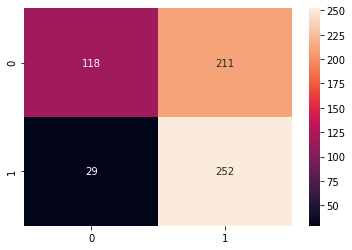

0.4 

Accuracy Score 0.6623
F1 Score 0.6677 

Confusion Matrix


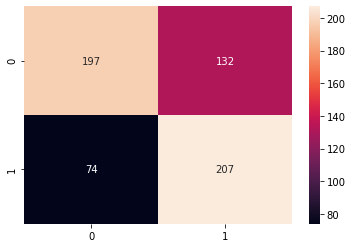

0.5 

Accuracy Score 0.6623
F1 Score 0.6098 

Confusion Matrix


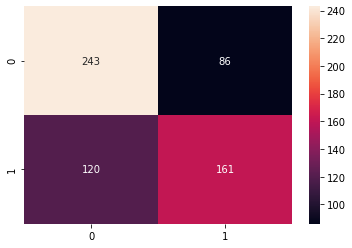

0.6 

Accuracy Score 0.6508
F1 Score 0.5192 

Confusion Matrix


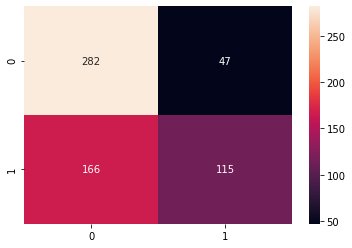

0.7 

Accuracy Score 0.6426
F1 Score 0.4263 

Confusion Matrix


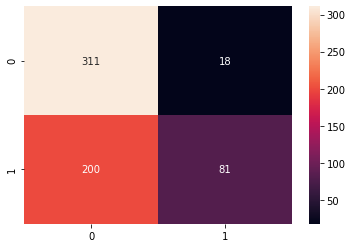

0.8 

Accuracy Score 0.5902
F1 Score 0.2038 

Confusion Matrix


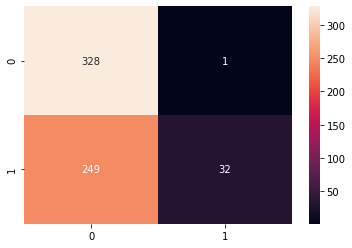

0.9 

Accuracy Score 0.5426
F1 Score 0.0141 

Confusion Matrix


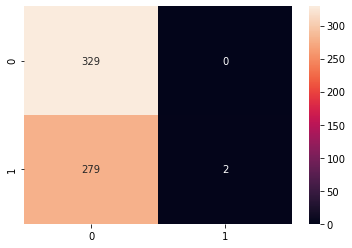

In [322]:
for j in np.arange(0.1,1,0.1):
    custom_prob = j #defining the cut-off value of our choice
    custom_cutoff_data=[]#defining an empty list
    for i in range(0,len(y_train)):#defining a loop for the length of the test data
        if np.array(pred_prob_train[:,1])[i] > custom_prob:#issuing a condition for our probability values to be 
            #greater than the custom cutoff value
            a=1#if the probability values are greater than the custom cutoff then the value should be 1
        else:
            a=0#if the probability values are less than the custom cutoff then the value should be 0
        custom_cutoff_data.append(a)#adding either 1 or 0 based on the condition to the end of the list defined by us
    print(round(j,3),'\n')
    print('Accuracy Score',round(metrics.accuracy_score(y_train,custom_cutoff_data),4))
    print('F1 Score',round(metrics.f1_score(y_train,custom_cutoff_data),4),'\n')
    plt.figure(figsize=(6,4))
    print('Confusion Matrix')
    sns.heatmap(metrics.confusion_matrix(y_train,custom_cutoff_data),annot=True,fmt='.4g'),'\n\n'
    plt.show();

In [323]:
#Predicting the classes on the test data

data_pred_custom_cutoff=[]
for i in range(0,len(pred_prob_test[:,1])):
    if np.array(pred_prob_test[:,1])[i]>0.2:
        a=1
    else:
        a=0
    data_pred_custom_cutoff.append(a)

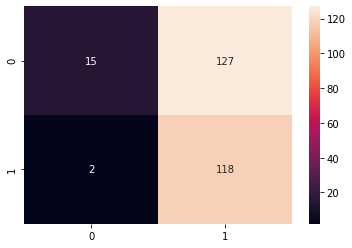

In [325]:
sns.heatmap((metrics.confusion_matrix(y_test,data_pred_custom_cutoff)),annot=True,fmt='.5g');

In [326]:
print('Classification Report of the default cut-off test data:\n\n',metrics.classification_report(y_test,pred_class_test),'\n\n\n')
print('Classification Report of the custom cut-off test data:\n\n',metrics.classification_report(y_test,data_pred_custom_cutoff),'\n')

Classification Report of the default cut-off test data:

               precision    recall  f1-score   support

           0       0.65      0.76      0.70       142
           1       0.65      0.52      0.57       120

    accuracy                           0.65       262
   macro avg       0.65      0.64      0.64       262
weighted avg       0.65      0.65      0.64       262
 



Classification Report of the custom cut-off test data:

               precision    recall  f1-score   support

           0       0.88      0.11      0.19       142
           1       0.48      0.98      0.65       120

    accuracy                           0.51       262
   macro avg       0.68      0.54      0.42       262
weighted avg       0.70      0.51      0.40       262
 

